In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [46]:
N=1000
std=0.6

banana_width=np.random.normal(4,std,N)
banana_height=np.random.normal(8,std,N)

apple_width=np.random.normal(6,std,N)
apple_height=np.random.normal(6,std,N)

width=np.concatenate((banana_width,apple_width))
height=np.concatenate((banana_height,apple_height))

X=np.array([width,height]).T

apple_label=np.zeros(N,dtype='int')
banana_label=np.ones(N,dtype='int')
Y=np.concatenate((apple_label,banana_label))

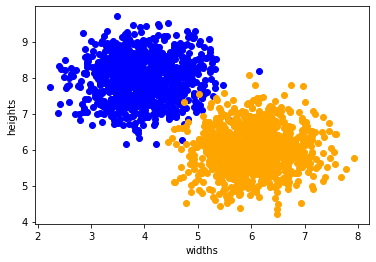

In [47]:
plt.figure()
plt.scatter(X[0:N,0],X[0:N,1], c='blue')
plt.scatter(X[N:,0],X[N:,1], c='orange')

plt.xlabel('widths')
plt.ylabel('heights')
plt.show()

In [48]:
class KNearestNeighbors:
    def __init__(self, k):
        self.k = k
        
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
        self.number_class = len(np.unique(y_train))
        
    def nearestNeighbors(self, x_test):
        distance = np.sqrt(np.sum((x_test - self.x_train)**2, axis = 1))
        near_neighbor = np.argsort(distance)[0:self.k]
        return near_neighbor
    
    def predict(self, x_test):
        near_neighbor = self.nearestNeighbors(x_test)
        y = np.argmax(np.bincount(self.y_train[near_neighbor]))
        return y
    def evaluate(self,x_test,y_test):
        temp=[]
        c=0
        self.x_test=x_test
        self.y_test=y_test
        for t in self.x_test:
            temp.append(self.predict(t))
        for i in range(len(x_test)):
            if temp[i]==y_test[i]:
                c+=1
        ev=c/len(y_test)
        return ev

In [65]:
knn=KNearestNeighbors(k=7)
knn.fit(X,Y)
new=np.array([4.7,6.8])
knn.predict(new)


0

In [66]:
# N=1000
# std=0.6
# test_width=np.random.normal(6,std,N)
# test_height=np.random.normal(6,std,N)
# X_test=np.array([test_width,test_height]).T
# Y_test=np.random.randint(2,size=N)

In [74]:
knn = KNearestNeighbors(k=5)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35,random_state=42)
knn.fit(X_train,Y_train)
knn.evaluate(X_test, Y_test)

0.9942857142857143

In [75]:
from sklearn.neighbors import KNeighborsClassifier
nc=KNeighborsClassifier(n_neighbors=5)
nc.fit(X,Y)
p=nc.predict(X_test)
ev = (p== Y_test).sum()/len(Y_test)
print(ev)

0.9985714285714286
